<a href="https://colab.research.google.com/github/MRuzzoli/BHD24_GIT/blob/Manu_BHD2024/EEG_to_BIDS_workshop_BHD2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Useful Links**
[EEG BIDS dataset example](https://openneuro.org/datasets/ds005620/versions/1.0.0)

[MNE-BIDS docs](https://mne.tools/mne-bids/stable/api.html
)

[BIDS EEG docs](https://bids-specification.readthedocs.io/en/stable/modality-specific-files/electroencephalography.html
)

In [ ]:
!rm -rf /content/*


# **Our goal**

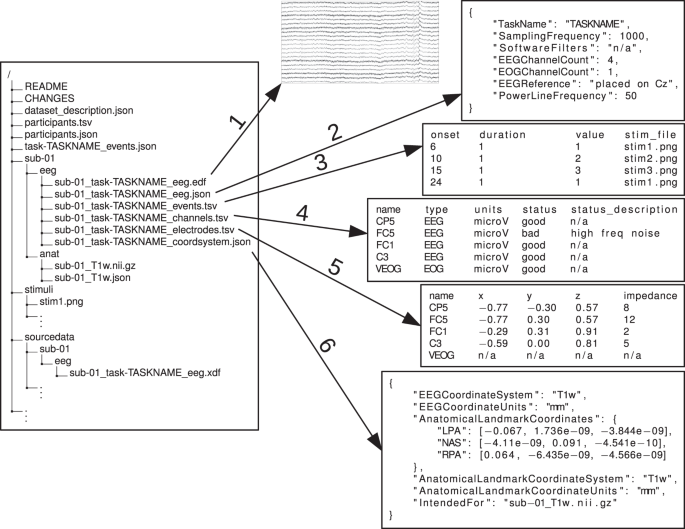

# **0. Initial Setup**

To be able to edit the code **save a copy on your Google Drive**

## **Download data from Google Drive**


In [ ]:
import os
!pip install gdown

# Define la ID de la carpeta y la ruta de descarga
folder_id = "1siyAzEGO_aRGKCQ2redy_Q3vjVBq5Q39"
data_path = "/content/rawdata"

# Crea el directorio si no existe
os.makedirs(data_path, exist_ok=True)

# Descarga usando gdown con el formato correcto
!gdown "https://drive.google.com/drive/folders/{folder_id}" --folder -O "{data_path}"

# Verificar archivos en la carpeta de datos
print(os.listdir(data_path))


Retrieving folder contents
Processing file 1JfqtB76RadJMS23uI1vd5X7VjrJGeNmo EEGManyLabs1_BCBL_0001.eeg
Processing file 1ZpxYABBtWDNG1fTwSqC33q5iM4GO6yNe EEGManyLabs1_BCBL_0001.vhdr
Processing file 11XbrthY3Bo0Nfj82FSJBWgX4sn22NWQx EEGManyLabs1_BCBL_0001.vmrk
Processing file 1G9TCbBucjDbNJFWwAMpEA2QoSRp4T3bq EEGManyLabs1_BCBL_0002.eeg
Processing file 1gQgVqWuua-1lTzpLsFZQmcGSnBA6wHyY EEGManyLabs1_BCBL_0002.vhdr
Processing file 1RBnUmO5Ltgh6HeONK9X-4VUKmCFdc3qU EEGManyLabs1_BCBL_0002.vmrk
Processing file 1d09MbrH3Dufqp95ZqbOC0WnkZhHcVtCF EEGManyLabs1_BCBL_0004.eeg
Processing file 1AYhR0j5AkuartKwlDxve0dkwd6oY-bkV EEGManyLabs1_BCBL_0004.vhdr
Processing file 1L2io145P_p3tCCuwnKrb4vchwkPyzQE6 EEGManyLabs1_BCBL_0004.vmrk
Processing file 15GQcTXEnAT6LCfpVhTScGDEh-GCW7Cdg EEGManyLabs1_BCBL_0006.eeg
Processing file 1blad99VkSuf4ZSvnh4tXca3g_Q1ek10u EEGManyLabs1_BCBL_0006.vhdr
Processing file 11Za25TzTO1YEJ68oKHch3Wj7ewwx1Acr EEGManyLabs1_BCBL_0006.vmrk
Retrieving folder contents completed
Buil

## **Dependencies**

In [ ]:
# Instalar mne y mne-bids
!pip install mne mne-bids
import mne
from mne_bids import write_raw_bids, BIDSPath, print_dir_tree


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.8/166.8 kB 10.2 MB/s eta 0:00:00


# **1. Main BIDS structure**

## **1.1 Copyfile Brainvision**

In [ ]:
import os
from mne_bids.copyfiles import copyfile_brainvision

# Definir la ruta de los datos en Google Colab
data_path = "/content/rawdata"

# Rutas originales y renombradas dentro del entorno de Colab
original_file = f"{data_path}/EEGManyLabs1_BCBL_0004.vhdr"  # Ruta del archivo original
new_file = f"{data_path}/EEGManyLabs1_BCBL_0003.vhdr"      # Nueva ruta con el nombre renombrado

# Función para renombrar un archivo BrainVision usando copyfile_brainvision
def rename_and_remove_triplet(original_file, new_file):
    if os.path.exists(original_file) and original_file.endswith('.vhdr'):
        try:
            # Copiar el triplete de archivos
            copyfile_brainvision(original_file, new_file, verbose=True)
            print(f"Archivo renombrado correctamente:\n{original_file} -> {new_file}")

            # Eliminar el triplete de archivos originales
            base_name = os.path.splitext(original_file)[0]
            extensions = ['.vhdr', '.vmrk', '.eeg']  # Extensiones típicas del triplete BrainVision
            for ext in extensions:
                file_to_remove = f"{base_name}{ext}"
                if os.path.exists(file_to_remove):
                    os.remove(file_to_remove)
                    print(f"Archivo eliminado: {file_to_remove}")
                else:
                    print(f"Archivo no encontrado (no se eliminó): {file_to_remove}")
        except Exception as e:
            print(f"Error al renombrar {original_file}: {e}")
    else:
        print(f"El archivo {original_file} no existe o no es un archivo .vhdr válido.")


# Llamar a la función para renombrar y eliminar
rename_and_remove_triplet(original_file, new_file)



Created "EEGManyLabs1_BCBL_0004.eeg" in "/content/rawdata".
Created "EEGManyLabs1_BCBL_0004.vhdr" in "/content/rawdata".
Created "EEGManyLabs1_BCBL_0004.vmrk" in "/content/rawdata".
Archivo renombrado correctamente:
/content/rawdata/EEGManyLabs1_BCBL_0006.vhdr -> /content/rawdata/EEGManyLabs1_BCBL_0004.vhdr
Archivo eliminado: /content/rawdata/EEGManyLabs1_BCBL_0006.vhdr
Archivo eliminado: /content/rawdata/EEGManyLabs1_BCBL_0006.vmrk
Archivo eliminado: /content/rawdata/EEGManyLabs1_BCBL_0006.eeg


## **1.2. First participant to BIDS**

In [ ]:


# Define la ruta de los datos originales (renombrados previamente)
data_path = "/content/rawdata"
vhdr_file = f"{data_path}/EEGManyLabs1_BCBL_0001.vhdr"

# Carga los datos con MNE
raw = mne.io.read_raw_brainvision(vhdr_file, preload=False)

# Configura el BIDSPath para el sujeto 1
bids_root = "/content/BIDS_dataset"
bids_path = BIDSPath(subject="001", session="01", task="rest", root=bids_root, suffix="eeg")

# Convierte y escribe en BIDS
write_raw_bids(raw, bids_path, overwrite=True)

# Imprime la estructura BIDS para verificar
print_dir_tree(bids_root)


Extracting parameters from /content/rawdata/EEGManyLabs1_BCBL_0001.vhdr...
Setting channel info structure...
Extracting parameters from /content/rawdata/EEGManyLabs1_BCBL_0001.vhdr...
Setting channel info structure...
Writing '/content/BIDS_dataset/README'...
Writing '/content/BIDS_dataset/participants.tsv'...
Writing '/content/BIDS_dataset/participants.json'...
The provided raw data contains annotations, but you did not pass an "event_id" mapping from annotation descriptions to event codes. We will generate arbitrary event codes. To specify custom event codes, please pass "event_id".
Used Annotations descriptions: ['Comment/actiCAP Data On', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  7', 'Stimulus/S200']
Writing '/content/BIDS_dataset/sub-001/ses-01/eeg/sub-001_ses-01_task-rest_events.tsv'...
Writing '/content/BIDS_dataset/sub-001/ses-01/eeg/sub-001_ses-01_task-rest_events.json'...
Writing '/conten

### caveat

The provided raw data contains annotations, but you did not pass an "event_id" mapping from annotation descriptions to event codes. We will generate arbitrary event codes. To specify custom event codes, please pass "event_id".

We will come back to this later.

In [ ]:
import pandas as pd

# Ruta al archivo events.tsv del participante
events_tsv_path = "/content/BIDS_dataset/sub-001/ses-01/eeg/sub-001_ses-01_task-rest_events.tsv"

# Leer el archivo TSV con pandas
events_df = pd.read_csv(events_tsv_path, sep='\t')

# Mostrar las primeras filas del archivo
print(events_df.head())


    onset  duration               trial_type  value  sample
0   0.000     0.001             New Segment/      2       0
1   0.000     0.001  Comment/actiCAP Data On      1       0
2  28.774     0.001            Stimulus/S200     10   28774
3  28.931     0.001            Stimulus/S  1      3   28931
4  29.584     0.001            Stimulus/S  4      6   29584


## **1.3. Rest of participants**


In [ ]:
# Ruta de los datos y destino BIDS
data_path = "/content/rawdata"  # Ruta donde están los archivos BrainVision
bids_root = "/content/BIDS_dataset"  # Carpeta raíz donde estará el dataset BIDS

# Lista de participantes y sus archivos originales (renombrados previamente)
participants = {
    "002": "EEGManyLabs1_BCBL_0002.vhdr",
    "003": "EEGManyLabs1_BCBL_0003.vhdr",
    "004": "EEGManyLabs1_BCBL_0004.vhdr"
}

# Función para convertir un participante al formato BIDS
def convert_to_bids(participant_id, vhdr_file, bids_root):
    try:
        # Carga los datos en formato BrainVision
        raw = mne.io.read_raw_brainvision(vhdr_file, preload=False)

        # Crea un BIDSPath para el participante
        bids_path = BIDSPath(subject=participant_id, session="01", task="rest", root=bids_root, suffix="eeg")

        # Escribe los datos en formato BIDS
        write_raw_bids(raw, bids_path, overwrite=True)
        print(f"Participante {participant_id} convertido exitosamente a BIDS.")
    except Exception as e:
        print(f"Error al convertir el participante {participant_id}: {e}")

# Procesar cada participante en la lista
for participant_id, vhdr_filename in participants.items():
    vhdr_file = os.path.join(data_path, vhdr_filename)  # Ruta completa al archivo .vhdr
    convert_to_bids(participant_id, vhdr_file, bids_root)

# Imprimir la estructura del dataset BIDS resultante
print("\nEstructura BIDS generada:")
print_dir_tree(bids_root)


Extracting parameters from /content/rawdata/EEGManyLabs1_BCBL_0002.vhdr...
Setting channel info structure...
Extracting parameters from /content/rawdata/EEGManyLabs1_BCBL_0002.vhdr...
Setting channel info structure...
Writing '/content/BIDS_dataset/participants.tsv'...
Writing '/content/BIDS_dataset/participants.json'...
The provided raw data contains annotations, but you did not pass an "event_id" mapping from annotation descriptions to event codes. We will generate arbitrary event codes. To specify custom event codes, please pass "event_id".
Used Annotations descriptions: ['Comment/actiCAP Data On', 'Comment/line noise', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  7', 'Stimulus/S200']
Writing '/content/BIDS_dataset/sub-002/ses-01/eeg/sub-002_ses-01_task-rest_events.tsv'...
Writing '/content/BIDS_dataset/sub-002/ses-01/eeg/sub-002_ses-01_task-rest_events.json'...
Writing '/content/BIDS_dataset/datas

# **2. Dataset level files**

## **2.1 dataset_description.json**

Read json file

In [ ]:
import json

# Ruta al archivo JSON
json_path = "/content/BIDS_dataset/dataset_description.json"

# Abrir y leer el archivo JSON
with open(json_path, 'r') as file:
    data = json.load(file)

# Mostrar el contenido del archivo JSON
print(json.dumps(data, indent=4))


{
    "Name": "EEG Many Labs Project BCBL",
    "BIDSVersion": "1.7.0",
    "DatasetType": "raw",
    "Authors": [
        "Manuela Ruzzoli",
        "Your Name"
    ],
    "License": "CC0",
    "Funding": [
        "Grant XYZ",
        "Funding Agency ABC"
    ],
    "DatasetDOI": "10.1234/dataset.doi"
}


Edit json file

**note** there is a MNE function for this (mne_bids.update_sidecar_json) but I was not able to make it work on this environment

In [ ]:
import json

# Ruta al archivo JSON
json_path = "/content/BIDS_dataset/dataset_description.json"

# Leer el archivo JSON existente
with open(json_path, 'r') as file:
    data = json.load(file)

# Modificar los campos del archivo JSON
data["Name"] = "EEG Many Labs Project BCBL"
data["BIDSVersion"] = "1.7.0"
data["DatasetType"] = "raw"  # raw, derivatives o sourcedata
data["Authors"] = ["Manuela Ruzzoli", "Your Name"]
data["License"] = "CC0"  # Licencia pública de dominio
data["Funding"] = ["Grant XYZ", "Funding Agency ABC"]
data["DatasetDOI"] = "10.1234/dataset.doi"  # Cambia al DOI del dataset si está disponible

# Guardar los cambios en el archivo JSON
with open(json_path, 'w') as file:
    json.dump(data, file, indent=4)

print("Archivo dataset_description.json actualizado.")




Archivo dataset_description.json actualizado.


## **2.2 participants.tsv**

Read current tsv

In [ ]:
import pandas as pd
output_path = "/content/BIDS_dataset/participants.tsv"
df = pd.read_csv(output_path, sep="\t")
print(df)


  participant_id  age sex hand
0        sub-001   25   M    R
1        sub-002   30   F    R
2        sub-003   28   F    L
3        sub-004   23   M    R


edit tsv

In [ ]:
data = {
    "participant_id": ["sub-001", "sub-002", "sub-003", "sub-004"],
    "age": [25, 30, 28, 23],
    "sex": ["M", "F", "F", "M"],
    "hand": ["R", "R", "L", "R"]
}

# Crear un DataFrame
participants_df = pd.DataFrame(data)

# Guardar el archivo como TSV en la raíz del dataset BIDS
output_path = "/content/BIDS_dataset/participants.tsv"
participants_df.to_csv(output_path, sep="\t", index=False)
print(f"Archivo 'participants.tsv' generado en: {output_path}")

Archivo 'participants.tsv' generado en: /content/BIDS_dataset/participants.tsv


## **2.3 participants.json**

In [ ]:
import json

# Ruta al archivo JSON
json_path = "/content/BIDS_dataset/participants.json"

# Abrir y leer el archivo JSON
with open(json_path, 'r') as file:
    data = json.load(file)

# Mostrar el contenido del archivo JSON
print(json.dumps(data, indent=4))

{
    "participant_id": {
        "Description": "Unique participant identifier"
    },
    "age": {
        "Description": "Age of the participant at time of testing",
        "Units": "years"
    },
    "sex": {
        "Description": "Biological sex of the participant",
        "Levels": {
            "F": "female",
            "M": "male"
        }
    },
    "hand": {
        "Description": "Handedness of the participant",
        "Levels": {
            "R": "right",
            "L": "left",
            "A": "ambidextrous"
        }
    }
}


In [ ]:
import json

# Ruta al archivo JSON
json_path = "/content/BIDS_dataset/participants.json"

# Abrir y leer el archivo JSON existente
with open(json_path, 'r') as file:
    data = json.load(file)

# Eliminar las claves 'weight' y 'height' si existen
data.pop('weight', None)
data.pop('height', None)

# Guardar los cambios en el archivo JSON
with open(json_path, 'w') as file:
    json.dump(data, file, indent=4)

print("Los campos 'weight' y 'height' han sido eliminados del archivo participants.json.")


Los campos 'weight' y 'height' han sido eliminados del archivo participants.json.


# **3. Subject level files**

## Checkpoint!

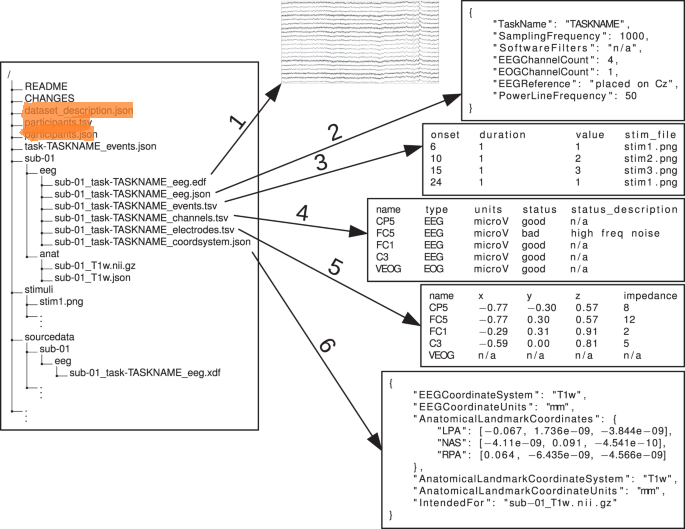

## **3.1 eeg.json**

read json

In [ ]:
import json

# Ruta al archivo JSON
json_path = "/content/BIDS_dataset/sub-001/ses-01/eeg/sub-001_ses-01_task-rest_eeg.json"

# Leer el archivo JSON
try:
    with open(json_path, 'r') as f:
        eeg_metadata = json.load(f)
    print("Contenido del archivo JSON:")
    print(json.dumps(eeg_metadata, indent=4))  # Mostrar con formato legible
except FileNotFoundError:
    print(f"El archivo {json_path} no se encuentra.")
except json.JSONDecodeError as e:
    print(f"Error al leer el archivo JSON: {e}")


Contenido del archivo JSON:
{
    "TaskName": "rest",
    "Manufacturer": "BrainVision",
    "PowerLineFrequency": 50,
    "SamplingFrequency": 1000.0,
    "SoftwareFilters": "None",
    "RecordingDuration": 4198.899,
    "RecordingType": "continuous",
    "EEGReference": "A1",
    "EEGGround": "A2",
    "EEGPlacementScheme": "10-10",
    "EEGChannelCount": 64,
    "EOGChannelCount": 0,
    "ECGChannelCount": 0,
    "EMGChannelCount": 0,
    "MiscChannelCount": 0,
    "TriggerChannelCount": 0
}


edit json

In [ ]:
import os
import json

# Ruta del directorio BIDS
bids_root = "/content/BIDS_dataset"

# Entradas a modificar en los archivos JSON
entries_to_update = {
    "Manufacturer": "BrainVision",
    "PowerLineFrequency": 50,
    "EEGReference": "A1",
    "EEGGround": "A2",
    "SoftwareFilters": "None",
    "EEGPlacementScheme": "10-10",
}


# Recorrer todo el dataset BIDS y actualizar los archivos JSON
for root, dirs, files in os.walk(bids_root):
    for file in files:
        if file.endswith("_eeg.json"):  # Identificar solo archivos EEG JSON
            json_path = os.path.join(root, file)

            # Leer el archivo JSON
            with open(json_path, 'r') as f:
                eeg_metadata = json.load(f)

            # Actualizar las entradas deseadas
            for key, value in entries_to_update.items():
                eeg_metadata[key] = value

            # Guardar los cambios en el archivo JSON
            with open(json_path, 'w') as f:
                json.dump(eeg_metadata, f, indent=4)

            print(f"Archivo actualizado: {json_path}")



Archivo actualizado: /content/BIDS_dataset/sub-004/ses-01/eeg/sub-004_ses-01_task-rest_eeg.json
Archivo actualizado: /content/BIDS_dataset/sub-003/ses-01/eeg/sub-003_ses-01_task-rest_eeg.json
Archivo actualizado: /content/BIDS_dataset/sub-002/ses-01/eeg/sub-002_ses-01_task-rest_eeg.json
Archivo actualizado: /content/BIDS_dataset/sub-001/ses-01/eeg/sub-001_ses-01_task-rest_eeg.json


## **3.2 events.tsv**

**Marker information**



```
Marker.Fixation.Target_Mask=1;
Marker.Fixation.Mask=2;
Marker.Fixation.Target=3;
Marker.Target_Onset=4;
Marker.Mask_Onset=5;
Marker.ResponseYes=6;
Marker.RespnseNo=7;



read events.tsv

In [ ]:
import pandas as pd

# Ruta al archivo events.tsv del participante 1
events_tsv_path = "/content/BIDS_dataset/sub-004/ses-01/eeg/sub-004_ses-01_task-rest_events.tsv"

# Leer el archivo TSV con pandas
events_df = pd.read_csv(events_tsv_path, sep='\t')

# Mostrar las primeras filas del archivo
print(events_df.head())


    onset  duration            trial_type  value  sample
0   0.000     0.000     Marker.NewSegment    100       0
1   0.000     0.001     Marker.NewSegment    100       0
2   0.020     0.000  Marker.actiCAPDataOn    101      20
3   0.020     0.001  Marker.actiCAPDataOn    101      20
4  51.116     0.000           Marker.S200    200   51116


fix events.tsv

In [ ]:
import os
import mne
from mne_bids import BIDSPath, write_raw_bids, read_raw_bids
import pandas as pd

# Ruta del dataset BIDS existente
bids_root = "/content/BIDS_dataset"

# Participantes a corregir
participants = ["001", "002", "003", "004"]

# Mapeo intermedio de descripciones
description_mapping = {
    "Stimulus/S  1": "Marker.Fixation.Target_Mask",
    "Stimulus/S  2": "Marker.Fixation.Mask",
    "Stimulus/S  3": "Marker.Fixation.Target",
    "Stimulus/S  4": "Marker.Target_Onset",
    "Stimulus/S  5": "Marker.Mask_Onset",
    "Stimulus/S  6": "Marker.ResponseYes",
    "Stimulus/S  7": "Marker.RespnseNo",
    "Stimulus/S200": "Marker.S200",
    "New Segment/": "Marker.NewSegment",
    "Comment/actiCAP Data On": "Marker.actiCAPDataOn",
    "Comment/line noise": "Marker.LineNoise",
}

# Definir el mapeo de anotaciones (event_id)
event_id = {
    "Marker.Fixation.Target_Mask": 1,
    "Marker.Fixation.Mask": 2,
    "Marker.Fixation.Target": 3,
    "Marker.Target_Onset": 4,
    "Marker.Mask_Onset": 5,
    "Marker.ResponseYes": 6,
    "Marker.RespnseNo": 7,
    "Marker.S200": 200,
    "Marker.NewSegment": 100,
    "Marker.actiCAPDataOn": 101,
    "Marker.LineNoise": 102,
}

# Función para corregir los eventos en los datos existentes
def correct_bids_events(participant_id, bids_root, description_mapping, event_id):
    try:
        # Leer los datos BIDS existentes
        bids_path = BIDSPath(subject=participant_id, session="01", task="rest", root=bids_root, suffix="eeg")
        raw = read_raw_bids(bids_path)

        # Transformar las descripciones en las anotaciones
        new_annotations = raw.annotations.copy()
        new_annotations.description = [
            description_mapping.get(desc, desc) for desc in raw.annotations.description
        ]
        raw.set_annotations(new_annotations)

        # Extraer eventos con el mapeo actualizado
        events, _ = mne.events_from_annotations(raw, event_id=event_id)

        # Sobrescribir los datos en BIDS con los eventos corregidos
        write_raw_bids(raw, bids_path, events=events, event_id=event_id, overwrite=True)
        print(f"Eventos corregidos para el participante {participant_id}.")
    except Exception as e:
        print(f"Error al corregir los eventos del participante {participant_id}: {e}")

# Corregir los participantes
for participant_id in participants:
    correct_bids_events(participant_id, bids_root, description_mapping, event_id)



Extracting parameters from /content/BIDS_dataset/sub-001/ses-01/eeg/sub-001_ses-01_task-rest_eeg.vhdr...
Setting channel info structure...
Reading events from /content/BIDS_dataset/sub-001/ses-01/eeg/sub-001_ses-01_task-rest_events.tsv.
Reading channel info from /content/BIDS_dataset/sub-001/ses-01/eeg/sub-001_ses-01_task-rest_channels.tsv.
Used Annotations descriptions: ['Marker.Fixation.Mask', 'Marker.Fixation.Target', 'Marker.Fixation.Target_Mask', 'Marker.Mask_Onset', 'Marker.NewSegment', 'Marker.RespnseNo', 'Marker.ResponseYes', 'Marker.S200', 'Marker.Target_Onset', 'Marker.actiCAPDataOn']
Extracting parameters from /content/BIDS_dataset/sub-001/ses-01/eeg/sub-001_ses-01_task-rest_eeg.vhdr...
Setting channel info structure...
Writing '/content/BIDS_dataset/participants.tsv'...
Writing '/content/BIDS_dataset/participants.json'...
Used Annotations descriptions: ['Marker.Fixation.Mask', 'Marker.Fixation.Target', 'Marker.Fixation.Target_Mask', 'Marker.Mask_Onset', 'Marker.NewSegment',

## **3.3 channels.tsv**

In [ ]:
import pandas as pd

# Ruta al archivo events.tsv del participante 1
events_tsv_path = "/content/BIDS_dataset/sub-001/ses-01/eeg/sub-001_ses-01_task-rest_channels.tsv"

# Leer el archivo TSV con pandas
events_df = pd.read_csv(events_tsv_path, sep='\t')

# Mostrar las primeras filas del archivo
print(events_df.head())


  name type units  low_cutoff  high_cutoff           description  \
0  Fp1  EEG    µV    0.015915       1000.0  ElectroEncephaloGram   
1  Fp2  EEG    µV    0.015915       1000.0  ElectroEncephaloGram   
2  AF3  EEG    µV    0.015915       1000.0  ElectroEncephaloGram   
3  AF4  EEG    µV    0.015915       1000.0  ElectroEncephaloGram   
4  AF7  EEG    µV    0.015915       1000.0  ElectroEncephaloGram   

   sampling_frequency status  status_description  
0              1000.0   good                 NaN  
1              1000.0   good                 NaN  
2              1000.0   good                 NaN  
3              1000.0   good                 NaN  
4              1000.0   good                 NaN  


# **4. Download BIDS dataset**

## **For this tutorial, let´s exclude sub-002, sub-003 and sub-004**

In [ ]:
import os
import zipfile

# Ruta del directorio BIDS
bids_root = "/content/BIDS_dataset"

# Ruta para el archivo comprimido
output_zip = "/content/BIDS_dataset_filtered.zip"

# Sujetos a excluir
subjects_to_exclude = ["sub-002", "sub-003", "sub-004"]

# Crear el archivo ZIP
with zipfile.ZipFile(output_zip, 'w', zipfile.ZIP_DEFLATED) as zf:
    for root, dirs, files in os.walk(bids_root):
        # Excluir carpetas de sujetos específicos
        dirs[:] = [d for d in dirs if d not in subjects_to_exclude]

        for file in files:
            # Ruta completa del archivo
            file_path = os.path.join(root, file)

            # Ruta relativa dentro del ZIP
            arcname = os.path.relpath(file_path, start=bids_root)

            # Agregar el archivo al ZIP
            zf.write(file_path, arcname)

print(f"Dataset comprimido en: {output_zip}")


Dataset comprimido en: /content/BIDS_dataset_filtered.zip


In [ ]:
from google.colab import files

# Descargar el archivo ZIP
files.download(output_zip)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **If you want to download the full dataset this is the code (est. download time 45 mins)**

In [ ]:
import shutil

# Ruta del directorio BIDS
bids_root = "/content/BIDS_dataset"

# Ruta para el archivo comprimido
output_zip = "/content/BIDS_dataset.zip"

# Comprimir el dataset BIDS en formato ZIP
shutil.make_archive(base_name=output_zip.replace(".zip", ""), format="zip", root_dir=bids_root)

print(f"Dataset comprimido en: {output_zip}")


KeyboardInterrupt: 

In [ ]:
from google.colab import files

# Descargar el archivo ZIP
files.download(output_zip)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **5. BIDS Validator**
https://bids-standard.github.io/bids-validator/